# <font color='#d35400'> Lab 3 | Data Visualization </font>
Welcome to Lab 3! This lab is about the Titanic dataset. For this lab, we use exploratory data analysis with a focus on using different visualization techniques. 

<p align="center">
  <img src="dog_painting.jpg" alt="Alt Text" />
</p>

### <font color='#FF8C00'> About the Dataset </font>
The dataset contains demographic information about passengers who were on board the Titanic as well as whether they survived or not. We focus on loading the data, building an understanding of the dataset, and cleaning the data for later use.

## <font color = '#FF8C00'> Section 1 </font> | Reading in the Data
In Section 1, we start off with using pandas to read our provided titanic dataset. This dataset is a updated version where missing values in the Age column are filled using mean, median, mode and KNN.


In [1]:
# importing the pandas library
import pandas as pd

# using the pandas library to read a csv file
titanic_df = pd.read_csv("titanic_filled.csv")

# viewing the titanic data frame using .head()
titanic_df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill_mean,Age_fill_median,Age_fill_mode,Age_fill_KNN
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,22.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,38.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,26.0


Next, we need to type the data appropriately. We do this converting the following variables, `Pclass`, `Sex` and `Embarked` using the `.astype()` method into a categorical variable.

In [2]:
# converting the Pclass variable into a categorical variable
titanic_df["Pclass"] = titanic_df["Pclass"].astype('category')

# converting the Sex variable into a categorical variable
titanic_df["Sex"] = titanic_df["Sex"].astype('category')

# converting the Embarked variable into a categorical variable
titanic_df["Embarked"] = titanic_df["Embarked"].astype('category')

## <font color = '#FF8C00'> Section 2 </font> | Classification
In this section, we work with the Titanic datset and the `Survived` feature as the target for a supervised machine learning problem. We work on creating a heatmap and determine appropriate visualizations to compare other variables such as `Fare`, `Sex`, `SibSp`, `Parch` and `Embarked` with `Survived`. Lastly, we create visualizations to compare `Age` and its imputed versions with `Survived`.


### <font color = '#FF8C00'> Creating a HeatMap </font>
We start off by retireiving all the data of the passengers using their respective `Pclass` and also the `Survived` data. We divide the data into two sections of passengers who have survived (1) and passengers who didn't (0) and then divided those two categories into three sub-categories of `Pclass` 1, 2 and 3.


In [3]:
# finding the total number of passengers that have a Pclass
passenger_list = titanic_df["Pclass"].values.tolist()

# printing out the total number of passengers
print("Passenger Numbers: ", len(passenger_list))

Passenger Numbers:  891


In [4]:

# retrieving all the Pclass values that survived into a list from the data frame
class_list_survived = titanic_df[titanic_df['Survived'] == 1]['Pclass'].values.tolist()
print("All Classes: ", class_list_survived)

# total number of classes
print("Total Number of Classes: ", len(class_list_survived))

# setting up the class counter
class_one_survived = 0
class_two_survived = 0
class_three_survived = 0

# calculating the number of occurrences each class
for n in class_list_survived:
    if n == 1:
        class_one_survived += 1
    if n == 2:
        class_two_survived += 1
    if n == 3:
        class_three_survived += 1

# printing out the occurrences of each class
print("Class One:", class_one_survived)
print("Class Two:", class_two_survived)
print("Class Three:", class_three_survived)

# doing a check on the numbers
if(class_one_survived + class_two_survived + class_three_survived == len(class_list_survived)):
    print("The totals of Class One, Two and Three are all equal to Overall Number")


All Classes:  [1, 3, 1, 3, 2, 3, 1, 2, 2, 3, 2, 3, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 1, 2, 1, 2, 2, 1, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 3, 3, 1, 3, 2, 3, 1, 3, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 3, 3, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 2, 3, 2, 1, 3, 1, 1, 1, 2, 3, 3, 1, 1, 3, 2, 3, 1, 3, 3, 3, 2, 3, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 3, 2, 1, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 2, 1, 3, 1, 3, 2, 3, 2, 1, 3, 2, 2, 2, 2, 3, 1, 3, 2, 1, 2, 2, 2, 3, 1, 2, 1, 3, 1, 1, 3, 1, 2, 1, 3, 2, 2, 3, 3, 1, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 1, 3, 3, 2, 1, 1, 3, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 3, 2, 2, 1, 3, 1, 1, 1, 2, 1, 3, 3, 1, 1, 3, 2, 3, 1, 3, 1, 2, 2, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 3, 2, 2, 3, 2, 2, 1, 3, 1, 1, 2, 3, 1, 3, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 1, 3, 3, 2, 3, 1, 3, 2, 1, 3, 1, 1, 1, 1, 3, 1

In [5]:
# retrieving all the Pclass values that died into a list from the data frame
class_list_died = titanic_df[titanic_df['Survived'] == 0]['Pclass'].values.tolist()
print("All Classes: ", class_list_died)

# total number of classes
print("Total Number of Classes: ", len(class_list_died))

# setting up the class counter
class_one_died = 0
class_two_died = 0
class_three_died = 0

# calculating the number of occurrences each class
for n in class_list_died:
    if n == 1:
        class_one_died += 1
    if n == 2:
        class_two_died += 1
    if n == 3:
        class_three_died += 1

# printing out the occurrences of each class
print("Class One:", class_one_died)
print("Class Two:", class_two_died)
print("Class Three:", class_three_died)

# doing a check on the numbers
if(class_one_died + class_two_died + class_three_died == len(class_list_died)):
    print("The totals of Class One, Two and Three are all equal to Overall Number")



All Classes:  [3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3, 2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 3, 1, 1, 3, 2, 3, 1, 1, 3, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 2, 3, 3, 2, 3, 1, 3, 1, 3, 3, 1, 2, 3, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 1

In [6]:
# doing a check to see if the numbers add up
if(len(class_list_survived) + len(class_list_died) == len(passenger_list)):
    print("The Survived and Died Numbers are equal to the numbers of Passengers")

The Survived and Died Numbers are equal to the numbers of Passengers


Cool! Now that we've managed to get the numbers on the numbers of passengers with respect to the `Pclass` and `Survived` variables, we can now start calculating our ratios. After we find our ratios, we then create a pivot table using `.pivot_table()`

In [7]:
# calculating the ratios of the survivors with respect to the Pclass
class_one_ratio_survived = class_one_survived / (class_one_died + class_one_survived)
class_two_ratio_survived = class_two_survived / (class_two_died + class_two_survived)
class_three_ratio_survived = class_three_survived / (class_three_died + class_three_survived)

# printing out the results
print("Class One Survived: ", class_one_ratio_survived, "\n", "Class Two Survived: ", class_two_ratio_survived, "\n",
      "Class three Survived: ", class_three_ratio_survived, "\n")

# # performing a probability check
# if(class_one_ratio_survived + class_two_ratio_survived + class_three_ratio_survived == 1):
#     print("The  Survived Ratios add up to 1! \n")


# calculating the ratios of the dead with respect to the Pclass
class_one_ratio_dead = class_one_died / (class_one_survived + class_one_died)
class_two_ratio_dead = class_two_died / (class_two_survived + class_two_died)
class_three_ratio_dead = class_three_died / (class_three_survived + class_three_died)

# printing out the results
print("Class One Dead: ", class_one_ratio_dead, "\n", "Class Two Dead: ", class_two_ratio_dead, "\n",
      "Class three Dead: ", class_three_ratio_dead, "\n")

# # performing a probability check
# if(class_one_ratio_dead + class_two_ratio_dead + class_three_ratio_dead == 1):
#     print("The Dead Ratios add up to 1!")


Class One Survived:  0.6296296296296297 
 Class Two Survived:  0.47282608695652173 
 Class three Survived:  0.24236252545824846 

Class One Dead:  0.37037037037037035 
 Class Two Dead:  0.5271739130434783 
 Class three Dead:  0.7576374745417516 



In [8]:
# creating a dictionary for the heat map table
heatmap_data = {
    'Survived' : [1, 2, 3],
    '0': [class_one_ratio_dead, class_two_ratio_dead, class_three_ratio_dead],
    '1': [class_one_ratio_survived, class_two_ratio_survived, class_three_ratio_survived]

}

# creating a data frame
heatmap_df = pd.DataFrame(heatmap_data)

# creating a pivot table
heatmap_pivot = heatmap_df.set_index('Survived').T

# printing out the pivot table
print(heatmap_pivot)

Survived        1         2         3
0         0.37037  0.527174  0.757637
1         0.62963  0.472826  0.242363


Great! Now that we've created the pivot table, we now easily convert this into a heatmap using the Seaborn library. To achieve this, we use `.heatmap()` from Seaborn with the pivot table as a parameter.

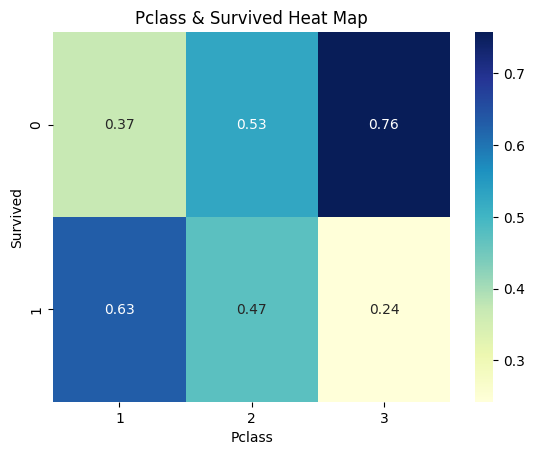

In [9]:
# importing the Seaborn library
import seaborn as sns

# importing the matplotlib library
import matplotlib.pyplot as plt

# creating the heatmap
sns.heatmap(heatmap_pivot, cmap="YlGnBu", annot=True)

# including plotting details
plt.title("Pclass & Survived Heat Map")
plt.xlabel("Pclass")
plt.ylabel("Survived")

# displaying the heatmap
plt.show()

### <font color = '#FF8C00'> Data Visualizations </font>
Next, we move on performing data visualizations. We compare the following variables, `Fare`, `Sex`, `SibSp`, `Parch` & `Embarked` against the `Survived` variable. 

Here are the following plotting types that will be used:
- For plotting `Fare` vs `Survived`, we can use box plot
- For plotting `Sex` vs `Survived`, we can use a bar chart
- For plotting `SibSp` vs `Survived`, we can use a box plot
- For plotting `Parch` vs `Survived`, we can use a box plot
- For plotting `Embarked` vs `Survived`, we can use a heatmap

### <font color = '#FF8C00'> `Fare` vs `Survived` </font>
As we know, `Fare` is a ratio numerical data type and `Survived` is a nominal binary categorical data type. When we plot a categorical vs numerical data type plot, we can use box plots for this representation.

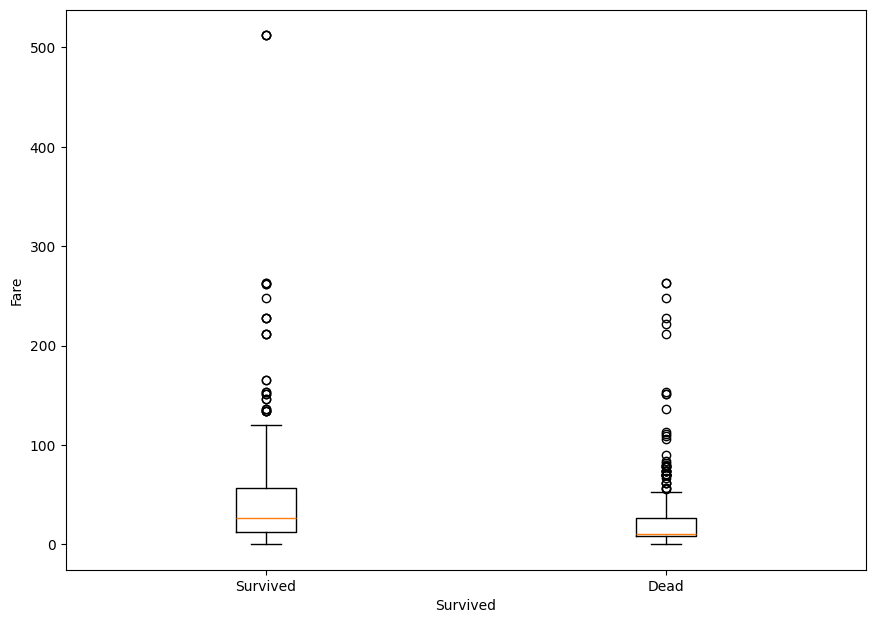

In [10]:
# collecting values of fare vs survived
fare_survived = titanic_df[titanic_df['Survived'] == 1]['Fare'].values.tolist()

# collecting values of fare vs dead
fare_dead = titanic_df[titanic_df['Survived'] == 0]['Fare'].values.tolist()

# creating an fare array
fare_data = [fare_survived, fare_dead]

# creating the figure
fig = plt.figure(figsize=(10, 7))

# creating the axes instances
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# creating the box plot
box_plot = ax.boxplot(fare_data)

# setting the labels for the box plot
ax.set_xticklabels(['Survived', 'Dead'])

# displaying the plot
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()


### <font color = '#FF8C00'> `Sex` vs `Survived` </font>
For this situation, we know that `Sex` is a nominal categorical data type, and `Survived` is a nominal binary categorical data type. We can convert the number of sexes into two divisions, male and female, and then count the numbers from each respective sex that have died or survived. For this, we can use a bar chart.

In [11]:
# collecting the values of the sex that survived from the data frame
fare_survived = titanic_df[titanic_df['Survived'] == 1]['Sex'].values.tolist()

# collecting the values of the sex that died from the data frame
fare_dead = titanic_df[titanic_df['Survived'] == 0]['Sex'].values.tolist()

# setting up the counters
survived_male = 0
dead_male = 0
survived_female = 0
dead_female = 0

# looping through the lists to update the counters
for n in fare_survived:
    if n == "male":
        survived_male += 1
    if n == "female":
        survived_female += 1

for n in fare_dead:
    if n == "male":
        dead_male += 1
    if n == "female":
        dead_female += 1

# checking if the numbers add up
total_female = survived_female + dead_female
total_male = survived_male + dead_male

if (total_female + total_male == len(fare_survived) + len(fare_dead)):
    print("The Numbers Add Up")

# calculating the ratio of sexes with respect to Survived
male_survived_ratio = survived_male / total_male
male_dead_ratio = dead_male / total_male
female_survived_ratio = survived_female / total_female
female_dead_ratio = dead_female / total_female

# printing out the results
print("Ratio of Male Alive: ", male_survived_ratio, "\n", "Ratio of Male Dead: ", male_dead_ratio, "\n",
      "Ratio of Female Alive: ", female_survived_ratio, "\n", "Ratio of Female Dead: ", female_dead_ratio)



The Numbers Add Up
Ratio of Male Alive:  0.18890814558058924 
 Ratio of Male Dead:  0.8110918544194108 
 Ratio of Female Alive:  0.7420382165605095 
 Ratio of Female Dead:  0.25796178343949044


In [12]:
# creating a dictionary for the heat map table
sex_survived_heatmap = {
    'Survived' : [0,1],
    'Male' : [male_dead_ratio, male_survived_ratio],
    'Female': [female_dead_ratio, female_survived_ratio]
}

# creating a data frame
sex_survived_df = pd.DataFrame(sex_survived_heatmap)

# creating a pivot table
sex_survived_pivot = sex_survived_df.set_index('Survived').T

# printing out the pivot table
print(sex_survived_pivot)

Survived         0         1
Male      0.811092  0.188908
Female    0.257962  0.742038


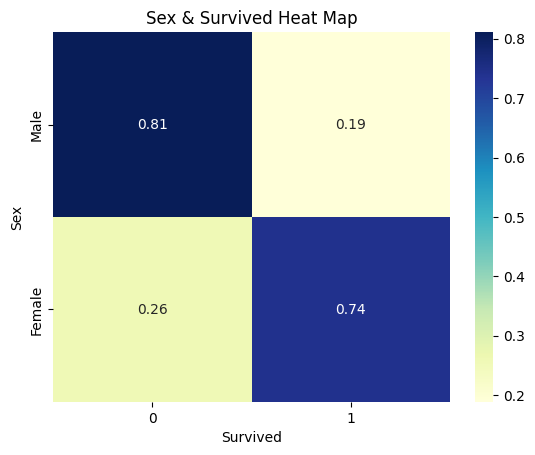

In [13]:
# creating the heatmap
sns.heatmap(sex_survived_pivot, cmap="YlGnBu", annot=True)

# including plotting details
plt.title("Sex & Survived Heat Map")
plt.xlabel("Survived")
plt.ylabel("Sex")

# displaying the heatmap
plt.show()

### <font color = '#FF8C00'> `SibSp` vs `Survived` </font>
Here, we know that `SibSp` is discrete numerical data type and `Survived` is a nominal binary categorical data type. In this situation, since we are dealing with plotting a numerical data type against a categorical data type, we can use a box plot to best represent this.

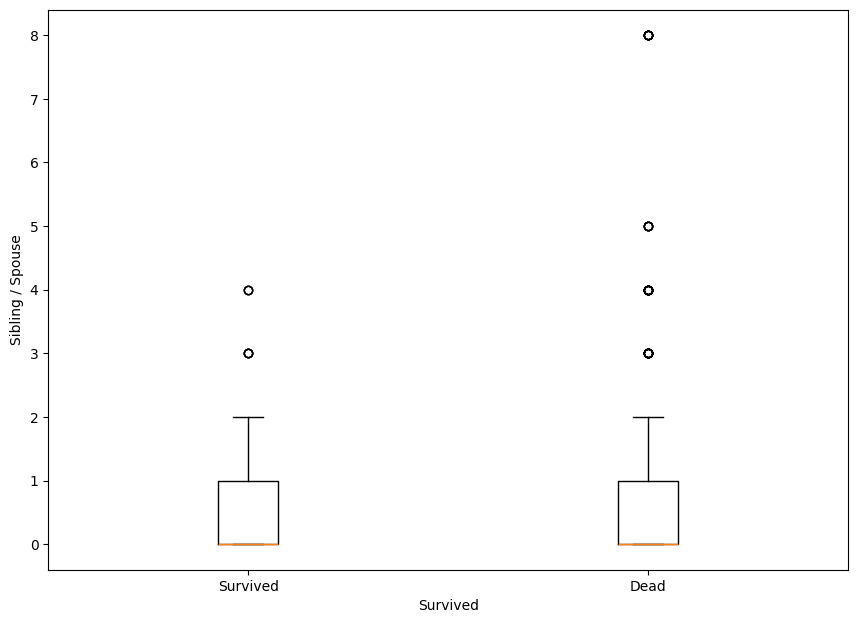

In [14]:
# collecting values of fare vs survived
sibsp_survived = titanic_df[titanic_df['Survived'] == 1]['SibSp'].values.tolist()

# plotting values of fare vs dead
sibsp_dead = titanic_df[titanic_df['Survived'] == 0]['SibSp'].values.tolist()

# creating an fare array
sibsp_data = [sibsp_survived, sibsp_dead]

# creating the figure
fig = plt.figure(figsize=(10, 7))

# creating the axes instances
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# creating the box plot
box_plot = ax.boxplot(sibsp_data)

# setting the labels for the box plot
ax.set_xticklabels(['Survived', 'Dead'])

# displaying the plot
plt.xlabel("Survived")
plt.ylabel("Sibling / Spouse")
plt.show()


### <font color = '#FF8C00'> `Parch` vs `Survived` </font>
For this situation, we can use `Parch` which is a discrete numerical data type and `Survived` which is a nominal binary categorical data type. For this situation, as we are plotting a numerical data type against a categorical data type, the best way to plot this is using a box plot.

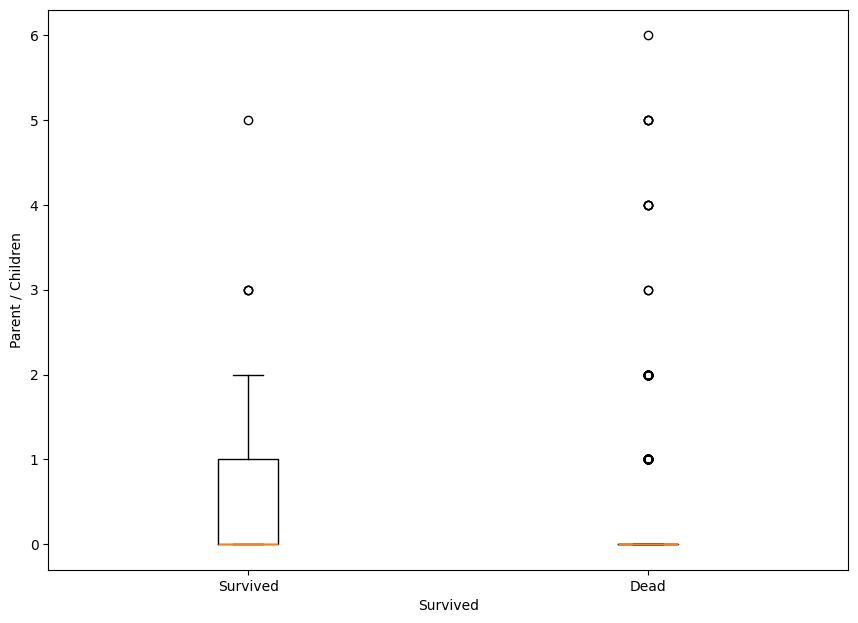

In [15]:
# collecting values of parch vs survived
parch_survived = titanic_df[titanic_df['Survived'] == 1]['Parch'].values.tolist()

# plotting values of parch vs dead
parch_dead = titanic_df[titanic_df['Survived'] == 0]['Parch'].values.tolist()

# creating an parch array
parch_data = [parch_survived, parch_dead]

# creating the figure
fig = plt.figure(figsize=(10, 7))

# creating the axes instances
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# creating the box plot
box_plot = ax.boxplot(parch_data)

# setting the labels for the box plot
ax.set_xticklabels(['Survived', 'Dead'])

# displaying the plot
plt.xlabel("Survived")
plt.ylabel("Parent / Children")
plt.show()

### <font color = '#FF8C00'> `Embarked` vs `Survived` </font>
Lastly, we now plot `Embarked` against `Survived`. We know that `Embarked` is a categorical nominal data type and `Survived` is a nominal binary categorical data type. For this situation, it would be best to use a heatmap since we're plotting a categorical variable against another categorical variable.

In [16]:
# retrieving all the embarked values that survived into a list from the data frame
embarked_list_survived = titanic_df[titanic_df['Survived'] ==  1]['Embarked'].values.tolist()

# retrieving all the embarked values that died into a list from the data frame
embarked_list_dead = titanic_df[titanic_df['Survived'] == 0]['Embarked'].values.tolist()

# setting up counter variables
embarked_C_survived = 0
embarked_C_dead = 0
embarked_Q_survived = 0
embarked_Q_dead = 0
embarked_S_survived = 0
embarked_S_dead = 0

# updating the counter values for survived
for n in embarked_list_survived:
    if n == "C":
        embarked_C_survived += 1
    if n == "Q":
        embarked_Q_survived += 1
    if n == "S":
        embarked_S_survived += 1

# updating the counter values for dead
for n in embarked_list_dead:
    if n == "C":
        embarked_C_dead += 1
    if n == "Q":
        embarked_Q_dead += 1
    if n == "S":
        embarked_S_dead += 1

# printing out the occurences of each class
print("Embarked C Survived: ", embarked_C_survived)
print("Embarked Q Survived: ", embarked_Q_survived)
print("Embarked S Survived: ", embarked_S_survived)
print("Embarked C Dead: ", embarked_C_dead)
print("Embarked Q Dead: ", embarked_Q_dead)
print("Embarked S Dead: ", embarked_S_dead)

# finding the totals
total_C = embarked_C_survived + embarked_C_dead
total_Q = embarked_Q_survived + embarked_Q_dead
total_S = embarked_S_survived + embarked_S_dead

Embarked C Survived:  93
Embarked Q Survived:  30
Embarked S Survived:  217
Embarked C Dead:  75
Embarked Q Dead:  47
Embarked S Dead:  427


In [17]:
# calculating the ratios between the embarked and survival variables
embarked_C_survived_ratio = embarked_C_survived / total_C
embarked_C_dead_ratio = embarked_C_dead / total_C

embarked_Q_survived_ratio = embarked_Q_survived / total_Q
embarked_Q_dead_ratio =  embarked_Q_dead / total_Q

embarked_S_survived_ratio = embarked_S_survived / total_S
embarked_S_dead_ratio = embarked_S_dead / total_S

# printing out the ratios
print("C Survived: ", embarked_C_survived_ratio, "\n", "Q Survived: ", embarked_Q_survived_ratio, "\n",
      "S Survived: ", embarked_S_survived_ratio, "\n", "C Dead: ", embarked_C_dead_ratio, "\n",
      "Q Dead: ", embarked_Q_dead_ratio, "\n", "S Dead: ", embarked_S_dead_ratio)

C Survived:  0.5535714285714286 
 Q Survived:  0.38961038961038963 
 S Survived:  0.33695652173913043 
 C Dead:  0.44642857142857145 
 Q Dead:  0.6103896103896104 
 S Dead:  0.6630434782608695


In [18]:
# creating a dictionary for the heat map table
embarked_survived_data = {
    'Survived': [0, 1],  # Survival status
    'C': [embarked_C_dead_ratio, embarked_C_survived_ratio],  
    'Q': [embarked_Q_dead_ratio, embarked_Q_survived_ratio],  
    'S': [embarked_S_dead_ratio, embarked_S_survived_ratio] 
}

# creating a data frame
embarked_survived_df = pd.DataFrame(embarked_survived_data)

# creating a pivot table
embarked_pivot = embarked_survived_df.set_index("Survived").T

# printing out the pivot table
print(embarked_pivot)

Survived         0         1
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


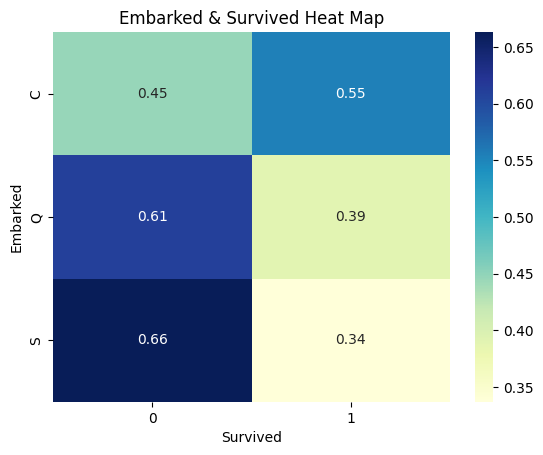

In [19]:
# creating the heatmap
sns.heatmap(embarked_pivot, cmap="YlGnBu", annot=True)

# including plotting details
plt.title("Embarked & Survived Heat Map")
plt.xlabel("Survived")
plt.ylabel("Embarked")

# displaying the heatmap
plt.show()

### <font color = '#FF8C00'> Age vs Survived </font>
Lastly, we need to detemine the best visualization to compare `Age` with `Survived`. For each of `Age_fill_mean`, `Age_fill_median`, `Age_fill_mode` and `Age_fill_KNN`, we create a visualization to compare this to `Survived`.

Given that we have described `Age` as a continuous numerical variable, when we compare it with `Survived`, we can use a violin plot, as we are using a numerical data type against a categorical data type. The same applies with `Age_fill_mean`, `Age_fill_median`, `Age_fill_mode` and `Age_fill_KNN`.


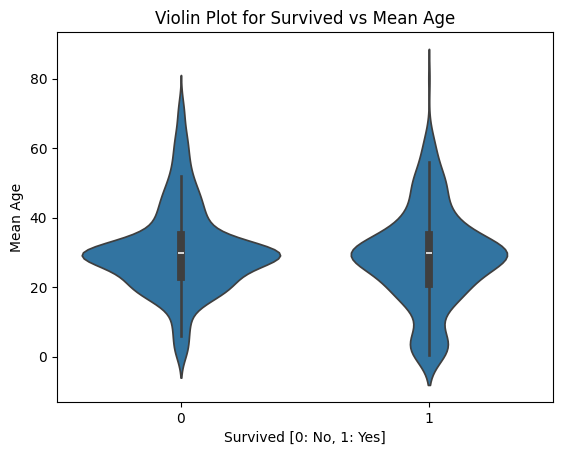

In [20]:
# extracting the age and age_fill_mean features
age_survived_mean = titanic_df[['Survived', 'Age_fill_mean']]

# creating the violin plot
sns.violinplot(x=age_survived_mean['Survived'], y=age_survived_mean['Age_fill_mean'])

# adding the plot details
plt.title("Violin Plot for Survived vs Mean Age")
plt.xlabel("Survived [0: No, 1: Yes]")
plt.ylabel("Mean Age")

# displaying the plot
plt.show()


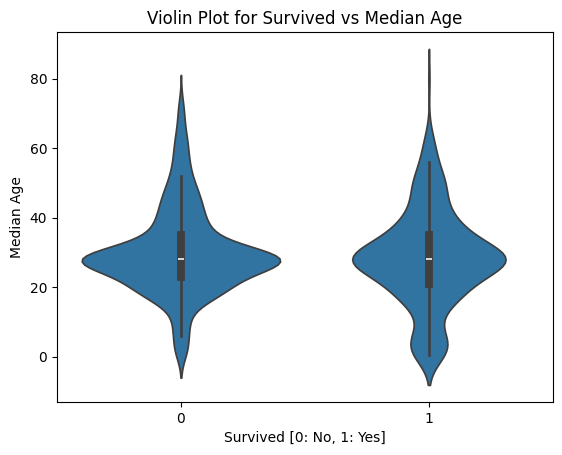

In [21]:
# extracting the age and age_fill_mean features
age_survived_median = titanic_df[['Survived', 'Age_fill_median']]

# creating the violin plot
sns.violinplot(x=age_survived_median['Survived'], y=age_survived_median['Age_fill_median'])

# adding the plot details
plt.title("Violin Plot for Survived vs Median Age")
plt.xlabel("Survived [0: No, 1: Yes]")
plt.ylabel("Median Age")

# displaying the plot
plt.show()

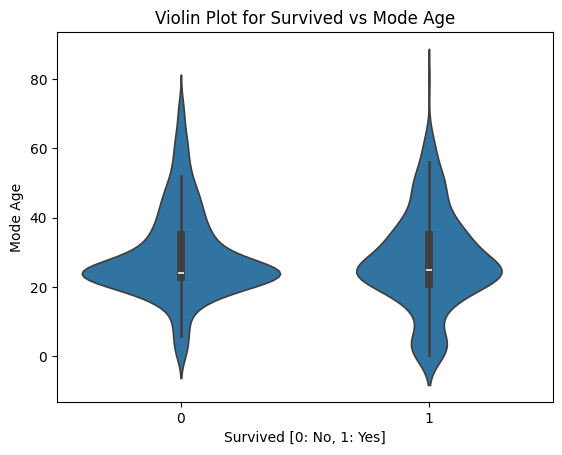

In [22]:
# extracting the age and age_fill_mean features
age_survived_mode = titanic_df[['Survived', 'Age_fill_mode']]

# creating the violin plot
sns.violinplot(x=age_survived_mode['Survived'], y=age_survived_mode['Age_fill_mode'])

# adding the plot details
plt.title("Violin Plot for Survived vs Mode Age")
plt.xlabel("Survived [0: No, 1: Yes]")
plt.ylabel("Mode Age")

# displaying the plot
plt.show()

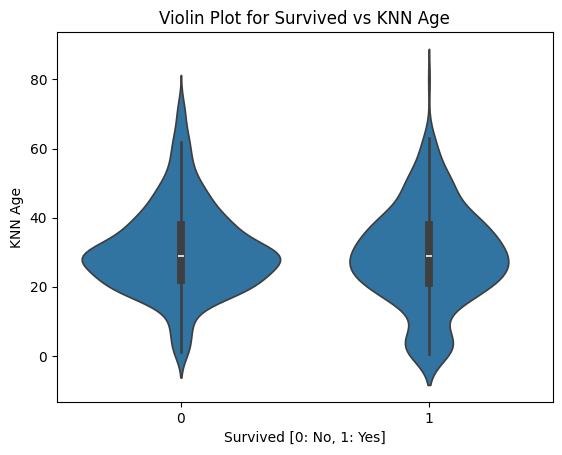

In [24]:
# extracting the age and age_fill_mean features
age_survived_knn = titanic_df[['Survived', 'Age_fill_KNN']]

# creating the violin plot
sns.violinplot(x=age_survived_knn['Survived'], y=age_survived_knn['Age_fill_KNN'])

# adding the plot details
plt.title("Violin Plot for Survived vs KNN Age")
plt.xlabel("Survived [0: No, 1: Yes]")
plt.ylabel("KNN Age")

# displaying the plot
plt.show()

### <font color='#FF8C00'> Sources Used For Section Two </font>
- https://www.geeksforgeeks.org/how-to-convert-pandas-column-to-list/
- https://www.w3schools.com/python/python_lists_loop.asp
- https://stackoverflow.com/questions/13694034/\is-a-python-list-guaranteed-to-have-its-elements-stay-in-the-order-they-are-inse
- https://www.tutorialspoint.com/how-to-create-a-pivot-table-in-python-using-pandas
- https://saturncloud.io/blog/how-to-plot-a-heatmap-from-pandas-dataframe/
- https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
- https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/

## <font color = '#FF8C00'> Section 3 </font> | Comparing Features
In this section, we will be comparing the `Age` and `Fare` variables. We compare these visually to see if they're correlated with each other. We do this using different visualization tehcniques shown below.


### <font color = '#FF8C00'> Scatterplot & Jointplot </font>
We start off by creating a scatter plot, where we plot `Age_fill_KNN` against `Fare`. We then move on to creating a joint plot as well. We achieve this using `.scatterplot` and `.jointplot` methods from Seaborn.

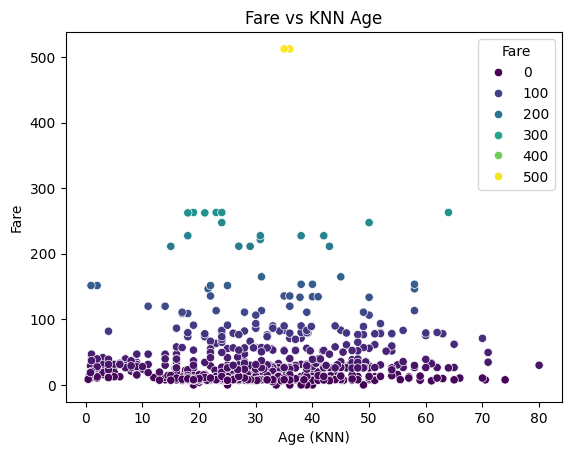

In [33]:
# extrating the age_fill_KNN and fare from the titanic dataset
age_fare_df = titanic_df[['Age_fill_KNN', 'Fare']]

# plotting the scatter plot
sns.scatterplot(x="Age_fill_KNN", y="Fare", data=age_fare_df, hue="Fare", palette="viridis")

# setting up the plot details
plt.title("Fare vs KNN Age")
plt.xlabel("Age (KNN)")
plt.ylabel("Fare")

# displaying the plot
plt.show()

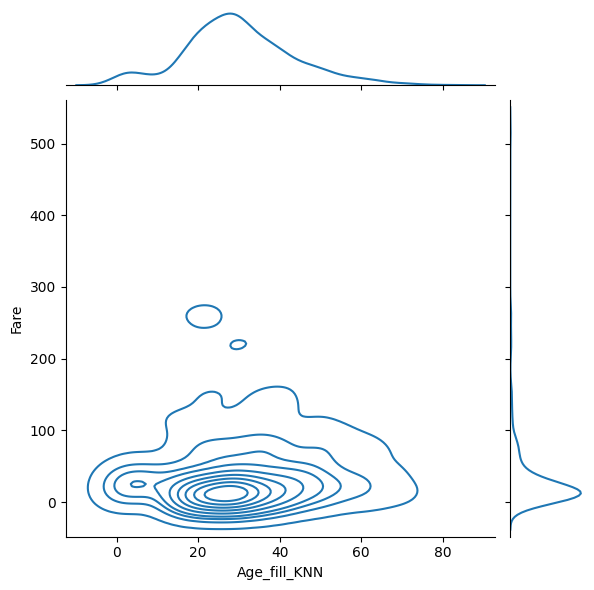

In [ ]:
# creating the joint plot
sns.jointplot(x="Age_fill_KNN", y="Fare", data=age_fare_df, kind='kde')

# setting up the plot details
plt.title("Violin Plot for Fare vs Age (KNN)")
plt.xlabel("Age (KNN)")
plt.ylabel("Fare")

# displaying the plot
plt.show()

### <font color='#FF8C00'> Sources Used For Section Three </font>
- https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/
- https://www.geeksforgeeks.org/python-seaborn-jointplot-method/